# Lecture 8: Explanatory Regression Analysis

## Contents
- [Imports](#section1)
- [Big picture](#section2)
- [The general expression and terminology](#section3)
- [Simple linear regression](#section4)
    - [The ordinary least squares (OLS) method](#subsection4.1)
    - [Goodness-of-fit](#subsection4.2)
    - [Expected values and variances of the OLS estimates](#subsection4.3)
- [Ceteris paribus analysis](#section5)
- [Multiple regression analysis](#section6)
    - [The OLS method for multiple regression models](#subsection6.1)
    - [Expected values and variances of the OLS estimators](#subsection6.2)
    - [Interpretation and inference of model parameters](#subsection6.3)
    - [Goodness-of-fit](#subsection6.4)
- [Nonlinearity](#section7)
- [Categorical variables and dummies](#section8)
    - [Dummies for two categories](#subsection8.1)
    - [Dummies for multiple categories](#subsection8.2)
    - [Interaction terms](#subsection8.3)
- [Case Studies](#section9)
    - [Singapore condo prices](#subsection9.1)
    

## Imports <a id="section1"></a>

In [20]:
import pandas as pd
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns

In [4]:
import os
os.chdir('/Users/Xinwei/Desktop/BMK5202 Py for BA/Dataset')

## Big picture <a id="section2"></a>

### "All models are wrong" and "no free lunch"
> *It has been said that **"all models are wrong but some models are useful."** In other words, any model is at best a useful fiction—there never was, or ever will be, an exactly normal distribution or an exact linear relationship. Nevertheless, enormous progress has been made by entertaining such fictions and using them as approximations.* - Statistical Control By Monitoring and Adjustment 

> *There is **no free lunch** in statistics: no one method dominates all others over all possible data sets. On a particular data set, one specific method may work best, but some other method may work better on a similar but different data set. Hence it is an important task to decide for any given set of data which method produces the best results.* - [An Introduction to Statistical Learning](https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf)

### The purpose of regression analysis
Regression analysis is primarily used for two conceptually distinct purposes: to infer relationships between the independent and dependent variables; and prediction (or forecasting). The former is named **explanatory modeling**, while the latter is the so called **predictive modeling**. These two purposes in some textbooks are described as **interpretation** and **prediction**.

Take the NBA draft case we discussed in tutorials for example
- **Explanatory modeling** explores the influence of players' weights (or heights) on their possible draft rounds;
- **Predictive modeling** predicts the draft round of a new player given his weight and height. 

Normally a regression model can not be used for both purposes, because they have quite different focuses:
> *In explanatory modeling the focus is on minimizing bias to obtain the most accurate representation of the underlying theory. In contrast, predictive modeling seeks to minimize the combination of bias and estimation variance, occasionally sacrificing theoretical accuracy for improved empirical precision* - [To Explain or to Predict](https://www.stat.berkeley.edu/~aldous/157/Papers/shmueli.pdf)

 ## The general expression and terminology <a id="section3"></a>
 
 A linear regression model can be generalized as the equation
 
 $$
 y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_p x_p + u,
 $$
 
where $\beta_0, \beta_1, ..., \beta_p$ are parameters of the model, and the table below gives the terminology of regression models.

$y$ |   $x_1, x_2, ..., x_p$  
:--------|:--------
**Dependent variable** | **Independent variables** 
**Explained variable** | **Explanatory variables**
**Response variable** | **Control variables**
**Predicted variable** | **Predictor variables**
**Regressand** | **Regressors**

Please note that these names for $x_1, x_2, ..., x_p$ and $y$ may be used interchangeably. Also notice that the term "independent" in the table above does not refer to the probabilistic independence in statistics.  

<div class="alert alert-block alert-danger">
<b>Notes: components of a linear regression model:</b> 
    <li> The variable $u$ is called the <b>error term</b> or <b>disturbance</b>. It represents factors other than $x_1, x_2, ..., x_p$ that affect the dependent variable $y$. You may consider $u$ as "unobserved" factors in the regression model. It is typically assumed that $\mathbb{E}(u|x_1, x_2, ..., x_p)=\mathbb{E}(u)=0$, which at least requires all factors in the unobserved error term $u$ be uncorrelated with the explanatory variables. 
    <li> The term $\beta_0$ is called the <b>intercept (parameter)</b>, or <b>constant term</b>. 
    <li> The term $\beta_j$, where $j=1, 2, ..., p$, is the <b>slope parameter</b>, indicating the relationship between $x_j$ and $y$. 
</div>

In explanatory modeling, we are interested in parameters of the **population regression function (PRF)**, expressed as

$$
\mathbb{E}(y|x_1, x_2, ..., x_p)=\beta_0 + \beta_1 x_1 + \beta_2 x_2 +...+ \beta_p x_p, 
$$
where the error term $u$ is canceled since according to our assumption the conditional expectation of it is $\mathbb{E}(u|x_1, x_2, ..., x_p)=0$. 

Please note the differences in the following notations related to $y$:
- $y$: the dependent variable.
- $y_i$: the $i$th observation of the dependent variable $y$ in the sample dataset.
- $\hat{y}$: the **fitted values** for $y$, expressed as the **sample regression function (SRF)** $\hat{y}=\hat{\beta}_0 + \hat{\beta}_1 x_1 + \hat{\beta}_2 x_2 + ... + \hat{\beta}_{p}x_p$, where $\hat{\beta}_0, \hat{\beta}_1, \hat{\beta}_2, ..., \hat{\beta}_p$ are estimates of the true values $\beta_0, \beta_1, \beta_2, ..., \beta_p$, respectively, based on the data sample. The $i$th fitted value of $\hat{y}$ is thus written as $\hat{y}_i$. 
- $\bar{y}$: the sample average of the dependent variable $y$.

Similarly, for the independent variable $x$, we have the following notations:
- $x_j$: the $j$th independent variable.
- $x_{ij}$ the $i$ observation of the $j$th independent variable in the sample dataset
- $\bar{x}_j$: the sample average of $j$th independent variables $x_j$. 

The notations for the error term $u$ are:
- $u$: the error term of the regression model.
- $\hat{u}_i$: the **residual** for observation $i$, expressed as $\hat{u}_i=y_i-\hat{y}_i$. 

You may notice that we can summarize most of these notations as follows.

Notation Types | Notations   
:-------------|:--------------
Variables | $x_j$, $y$, $u$
Data samples (the $i$th) | $x_{ij}$, $y_i$
Sample averages | $\bar{x}_j$, $\bar{y}$ 
Estimates from data | $\hat{y}$, $\hat{u}_i$, $\hat{\beta}_0$, $\hat{\beta}_j$

The following figure illustrates these notations for a simple linear regression model, where only one independent variable $x_1$ is considered. 

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/slr_notations.png?raw=true">

On the website [Programming for Business Analytics](https://share.streamlit.io/xiongpengnus/learn_dao/main/web.py), you may find an interactive data visual where the dataset is randomly generated assuming $\beta_0=1.0$ and $\beta_1=5.0$ for illustrating these notations.

Please note that the above examples are "cheating" cases, as we assume that we know the parameters of the PRF. In real applications, the PRF is unknown and we are supposed to use have a sample dataset. It is our ultimate goal to infer the parameters of the PRF from the sample data. 

## Simple linear regression <a id="section4"></a>

To begin with, we will use simple linear regression models in the following general form

$$
y = \beta_0 + \beta_1 x_1 + u
$$

to introduce how to estimate model parameters and how to interpret results. 

### The ordinary least squares (OLS) method  <a id="subsection4.1"></a>

The ordinary least squares (OLS) method is a commonly used method to estimate coefficients of regression models. The intuition of OLS is to minimize the overall residuals $\hat{u}_i$, or the differences between the observation $y_i$ and its fitted value $\hat{y}_i$. Mathematically, it minimizes the **sum of squared residuals (SSR)**, such that
$$
\min~\text{SSR} = \min\sum\limits_{i=1}^n\hat{u}_i^2 = \min\sum\limits_{i=1}^n(y_i - \hat{y}_i)^2. 
$$

The general procedure of applying this package for linear regression models can be summarized into four lines of code:
1. Import the module <code>statsmodels.formula.api</code>;
2. Define a linear regression model by the <code>ols()</code> function. The formula of the regression model is specified by a string, where the dependent and independent variables are indicated by the corresponding column labels of the data table. 
3. Calculate the fitted regression model by the <code>fit()</code> method of the regression model object. 
4. Print the results exported by the method <code>summary()</code>

In [5]:
data = pd.read_csv('xydata.csv')

model = smf.ols('y ~ x',    # Model formula: dependent variable y, independent variable x
                data=data)  # Variable 'data' as the dataset
result = model.fit()        # Calculate the fitted model parameters
print(result.summary())     # Print the summary of results

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.627
Method:                 Least Squares   F-statistic:                     32.92
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.94e-05
Time:                        11:24:04   Log-Likelihood:                -23.290
No. Observations:                  20   AIC:                             50.58
Df Residuals:                      18   BIC:                             52.57
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2819      0.406      3.157      0.0

### Goodness-of-fit <a id="subsection4.2"></a>

Recalling that in the OLS method, our goal is to minimize the **sum of squared residuals (SSR)**, expressed as
$$
\text{SSR} = \sum\limits_{i=1}^n\hat{u}_i^2 = \sum\limits_{i=1}^n(y_i - \hat{y}_i)^2. 
$$
Besides SSR, we introduce the other two terms called the **total sum of squares (SST)** and the **explained sum of squares (SSE)**, expressed below
$$
\text{SST} = \sum\limits_{i=1}^n(y_i - \bar{y})^2 \\
\text{SSE} = \sum\limits_{i=1}^n(\hat{y}_i - \bar{y})^2.
$$
Given an arbitrary dataset, the following equation always holds. 
$$
\text{SST} = \text{SSE} + \text{SSR}
$$
The intuition of this equation is that the total variation of the dependent variable $y$ (SST) can be attributed to 1) the linear effect of the independent variable $x$ (SSE); and 2) the variation of the error term, which cannot be explained by the fitted values of $\hat{y}$. 

In regression analysis, we are usually interested in the ratio of the explained variation SSE compared to the total variation SST. This ratio is referred to as the **coefficient of determination**, denoted by $R^2$.
$$
R^2 = \frac{\text{SSE}}{\text{SST}} = 1-\frac{\text{SSR}}{\text{SST}}.
$$

This term (can be found from the right-top corner of the summary table) is interpreted as the proportion of the sample variation in $y_i$ that is explained by the OLS regression line. Intuitively speaking, it reflects how well the regression line can capture the linear trend of the sample data, and larger values of $R^2$ is commonly preferred, but this is not always true, as we discuss in the next lecture. 

> *Students who are first learning econometrics tend to put too much weight on
the size of the $R^2$ in evaluating regression equations. For now, be aware that
using $R^2$ as the main gauge of success for an econometric analysis can lead
to trouble.* - [Introductory Econometrics: a modern approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) (Chapter 2)

### Expected values and variances of the OLS estimates <a id="subsection4.3"></a>
Please refer to the reference book [Introductory Econometrics: a modern approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf), page 45 to 56. 

## Ceteris paribus analysis<a id="section5"></a>
The notion of **ceteris paribus**—which means "other (relevant) factors being equal"—plays an important role in causal analysis. Recalling the condo price example we saw in previous lectures, in order to better "isolate" the influence of condo types (resale or new sale) on the prices, we need to adopt the ceteris paribus analysis where other factors, like condo sizes, are held equal. 

The simple regression models are considered ineffective in dealing with ceteris paribus analysis, as mentioned in the reference book. 

>*The primary drawback in using simple regression analysis for empirical work is that it is very difficult to draw ceteris paribus conclusions about how $x$ affects $y$: the key assumption, <b>SLR.4</b>$-$that all other factors affecting y are uncorrelated with $x-$is often unrealistic.*
> 
>*Multiple regression analysis is more amenable to ceteris paribus analysis because
it allows us to explicitly control for many other factors that simultaneously affect the
dependent variable. This is important both for testing economic theories and for evaluating policy effects when we must rely on nonexperimental data. Because multiple regression models can accommodate many explanatory variables that may be correlated, we can hope to infer causality in cases where simple regression analysis would be misleading.* - [Introductory Econometrics: a modern approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) (Chapter 3)


## Multiple regression analysis<a id="section6"></a>

### The OLS method for multiple regression models <a id="subsection6.1"></a>

We will still use functions imported from the <code>statsmodels</code> to implement the OLS method for multiple regression models. The Python code is very similar to the simple regression cases, and the only difference is that we need to use the <code>+</code> operator in the formula string to include multiple independent variables. 

<div class="alert alert-block alert-success">
<b>Example 1:</b> The 'advertising.csv' dataset consists of the sales of a product in 200 different markets (in thousands of units), along with advertising budgets (in thousands of dollars) for the product in each of those markets for three different media: TV, radio, and newspaper. Please use the following two linear regression models to explore how the advertising budgets affect the sales of the product:
\begin{align}
    \textbf{Simple regression:   }& y_{\text{sales}} = \beta_0 + \beta_1 x_{\text{newspaper}} + u \\
    \textbf{Multiple regressoin: }& y_{\text{sales}} = \beta_0 + \beta_1 x_{\text{TV}} + \beta_2 x_{\text{radio}} + \beta_3 x_{\text{newspaper}} + u
\end{align}
</div>

The dataset is read from the file "advertising.csv". 

In [6]:
data = pd.read_csv('advertising.csv')
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


The simple regression model can be implemented as follows.

In [7]:
model_sr = smf.ols('sales ~ newspaper', data=data)
result_sr = model_sr.fit()
print(result_sr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Sun, 17 Oct 2021   Prob (F-statistic):            0.00115
Time:                        11:24:24   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.3514      0.621     19.876      0.0

The multiple regression model can be implemented in the similar way.

In [8]:
model_mr = smf.ols('sales ~ TV + radio + newspaper', data=data)
result_mr = model_mr.fit()
print(result_mr.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           1.58e-96
Time:                        11:24:28   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.0

### Expected values and variances of the OLS estimators <a id="subsection6.2"></a>
Please refer to the reference book [Introductory Econometrics: a modern approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf), page 83 to 102. 

### Interpretation and inference of model parameters<a id="subsection6.3"></a>

In explanatory modeling, we are interested in the parameters of a regression model, because they reflect how the independent variables affect the dependent variables. In the equation 
$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_3 + ... \beta_p x_p + u, 
$$
notice that for an independent variable $x_j$, we would have $\Delta y = \beta_j \Delta x_j$ if $\Delta u = 0$ and holding all other independent variables fixed. In other words, the slope parameter $\beta_j$ measures the change in $y$ with respect to $x_j$, holding other factors fixed. This is why the multiple regression models are so useful in ceteris paribus analysis. 

Following the logic above, we may also conclude that the slope parameter $\beta_j$ determines whether the linear relationship is positive ($\beta_j>0$) or negative ($\beta_j <0$). A special case is that $\beta_j=0$, indicating that there is no linear relationship between the independent variable $x_j$ and the dependent variable $y$. 

In data science applications, all parameters $\beta_j$ of the PRF are unknown, and our goal is to infer the values of these parameters from sample data. Statistical inference of these population parameters are demonstrated by the example below.

<div class="alert alert-block alert-success">
    <b>Example 2:</b> Based on the multiple regression model in <b>Example 1</b>, explore how advertisement for different media affects the product sales.
</div>

The interpretation of each columns of the model parameters:
1. The first column gives the estimates of model parameters. They are $\hat{\beta}_0=2.9389$, $\hat{\beta}_1=0.0458$, $\hat{\beta}_2=0.1885$, and $\hat{\beta}_3=-0.0010$. These estimates can be retrieved by the attribute <code>params</code> of the object <code>result_mr</code>.

In [9]:
result_mr.params        # Estimates of model parameters

Intercept    2.938889
TV           0.045765
radio        0.188530
newspaper   -0.001037
dtype: float64

2. The second column gives the standard errors of model parameter estimators. For this example, $\text{SE}(\hat{\beta}_0)=0.312$, $\text{SE}(\hat{\beta}_1)=0.001$, $\text{SE}(\hat{\beta}_2)=0.009$, and $\text{SE}(\hat{\beta}_2)=0.006$. The standard error information can be retrieved by the attribute <code>bse</code> of the object <code>result_mr</code>.

In [10]:
result_mr.bse

Intercept    0.311908
TV           0.001395
radio        0.008611
newspaper    0.005871
dtype: float64

3. The third column are the $t$ values, expressed as 
$$
t_j = \frac{\hat{\beta}_j}{\text{SE}(\hat{\beta}_j)},~~j=0, 1, ..., p.
$$
These $t$ values will be used in two-tailed hypothesis tests where 
$$
\begin{cases}
H_0:~ \beta_j = 0 \\
H_a:~ \beta_j \not= 0
\end{cases}
~~~~~j=0, 1, ..., p.
$$
It can be seen that such hypothesis tests are used to verify if the independent variable $x_j$ has a linear relationship with the dependent variable $y$. 

4. The fourth column calculates the corresponding $P$-values of the two-tailed hypothesis tests. If the $P$-value for $x_j$ is lower than the significance level $\alpha$ (typically $\alpha=0.05$), we have sufficient evidence to reject the null hypothesis $H_0:~\beta_j=0$, or we say $x_j$ is **statistically significant** at the $\alpha$ significance level. The conclusion is hence that the model parameter $\beta_j$ is unlikely to be zero so $x_j$ has some linear relationship with $y$. For this example, our conclusion would be:
    - Variables $x_{\text{TV}}$ and $x_{\text{radio}}$ are statistically significant at the $0.05$ significance level. Advertising for TV and radio are likely to promote sales of the product.
    - The variable $x_{\text{newspaper}}$ is statistically insignificant. There might be very little effect of advertising for newspapers on the sales.
    
5. The fifth and sixth columns give the confidence intervals of each $\hat{\beta}_j$, given the confidence level to be $1-\alpha=0.95$.

If you are not familiar with the concepts of confidence intervals or hypothesis testing, please refer to the reference book [Introductory Econometrics: a modern approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf), page 770 to 783. Alternatively, you may visit the website [Programming for Business Analytics](https://share.streamlit.io/xiongpengnus/learn_dao/main/web.py) to review the related concepts.

### Goodness-of-fit<a id="subsection6.4"></a>

The SST, SSE, and SSR take the same expressions as the SLR case, so does the $R^2$ value for the percentage of variation explained by the regression line. However, the $R^2$ value is not an effective tool in determining model performance, and the reasons are given in the reference book.
>*An important fact about $R^2$ is that it never decreases, and it usually increases when
another independent variable is added to a regression.* 
>...
>*The fact that $R^2$ never decreases when any variable is added to a regression makes
it a poor tool for deciding whether one variable or several variables should be added to
a model.* - [Introductory Econometrics: a modern approach](https://economics.ut.ac.ir/documents/3030266/14100645/Jeffrey_M._Wooldridge_Introductory_Econometrics_A_Modern_Approach__2012.pdf) (Chapter 3)

This is why sometimes we would use the adjusted $R^2$ to compare two models in terms of the goodness-of-fit. The primary attractiveness of the adjusted $R^2$ is that it imposes a penalty for adding additional independent variables to a model, so we will not always prefer models with higher complexity. There is no need for you to derive the expression for the adjusted $R^2$ value. It is displayed at the top-right conner of the summary table of the regression model.

## Nonlinearity<a id="section7"></a>
The name "linear regression" is sometimes misleading because it seems to imply that this method is only capable of capturing linear relationship between the dependent and independent variable. **The key meaning of the term "linear" is that the equation is linear in the parameters $\beta_0$, $\beta_1$, ..., and $\beta_p$. There are no restrictions on how $y$ and each $x_j$ relate to the original dependent and independent variables of interest.** In other words, the dependent and independent variables could be functions or other transformations of $y$ and $x_j$, respectively, as long as the equation is linear in parameters $\beta_0$, $\beta_1$, ..., $\beta_p$. The following examples are provided as valid linear regression models. 
\begin{align}
& y = \beta_0 + \beta_1 x_1 + \beta_2 x_1^2 + \beta_3x_2 \\
& y = \beta_0 + \beta_1 \log(x_1) \\
& \sqrt{y} = \beta_0 + \beta_1 x_1 + \beta_2 \log(x_1).  \\
\end{align}

<div class="alert alert-block alert-success">
<b>Example 3:</b> The 'wage.csv' dataset consists of the wages of a number of working individuals for the year 1976. Considering all females in the dataset, run the following two models and interpret the results:
\begin{align}
    \textbf{Model 1: }& y_{\text{wage}} = \beta_0 + \beta_1 x_{\text{exper}} + u \\
    \textbf{Model 2: }& y_{\text{wage}} = \beta_0 + \beta_1 x_{\text{exper}} + \beta_2 \sqrt{x_{\text{exper}}} + u
\end{align}
</div>
In this example, we only consider the independent variable $x_{\text{exper}}$ and its nonlinear transformations, because it is easier for us to visualize the results. The following code segment is used to take a subset of the sample data that contains only females.

In [11]:
wage = pd.read_csv('wage.csv')
wage_female = wage.loc[wage['gender']=='Female']
wage_female.head()

,wage,educ,exper,gender,married
0,3.10,11.0,2.0,Female,False
1,3.24,12.0,22.0,Female,True
7,5.00,12.0,5.0,Female,False
8,3.60,12.0,26.0,Female,False
10,6.25,16.0,8.0,Female,False


In [24]:
np.log10(wage["wage"])

0      0.491362
1      0.510545
2      0.477121
3      0.778151
4      0.724276
         ...   
521    1.176091
522    0.356026
523    0.669317
524    1.062958
525    0.544068
Name: wage, Length: 526, dtype: float64

**Model 1** is specified and implemented by the code cell below.

In [12]:
model1 = smf.ols('wage ~ exper', data=wage_female)
result1 = model1.fit()
print(result1.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                   0.01564
Date:                Sun, 17 Oct 2021   Prob (F-statistic):              0.901
Time:                        11:24:40   Log-Likelihood:                -590.91
No. Observations:                 252   AIC:                             1186.
Df Residuals:                     250   BIC:                             1193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.6117      0.250     18.441      0.0

It is observed that the $P$-value for the parameter $\beta_1$ as the slope of $x_{\text{exper}}$ is 0.901, much larger than the significance level $\alpha=0.05$, so we failed to reject the null hypothesis that $H_0:~\beta_1=0$. In other words, The independent variable $x_{\text{exper}}$ may have no linear relationship with the dependent variable $y_{\text{wage}}$. Can we say that the working experience $x_{\text{exper}}$ has no effect on the hourly wage $y_{\text{wage}}$?

This question could be answered by visualizing the relation between $x_{\text{exper}}$ and $y_{\text{wage}}$.

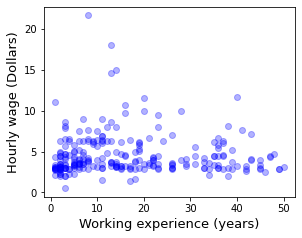

In [13]:
plt.figure(figsize=(4.5, 3.5))
plt.scatter(wage_female['exper'], wage_female['wage'], 
            c='b', alpha=0.3)

plt.xlabel('Working experience (years)', fontsize=13)
plt.ylabel('Hourly wage (Dollars)', fontsize=13)
plt.show()

From the diagram above, we observe that there is in fact some relation between $x_{\text{exper}}$ and $y_{\text{wage}}$, but this relation is not linear. The hourly wage increases at first then drops as working experience grows, and such a trend can be better captured if we include a nonlinear term, like a square root of $x_{\text{exper}}$, into the regression model.  

In [26]:
model2 = smf.ols('wage ~ exper + np.sqrt(exper)', data=wage_female)
result2 = model2.fit()
print(result2.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     6.850
Date:                Sun, 17 Oct 2021   Prob (F-statistic):            0.00127
Time:                        11:42:54   Log-Likelihood:                -584.17
No. Observations:                 252   AIC:                             1174.
Df Residuals:                     249   BIC:                             1185.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.9159      0.769      2.

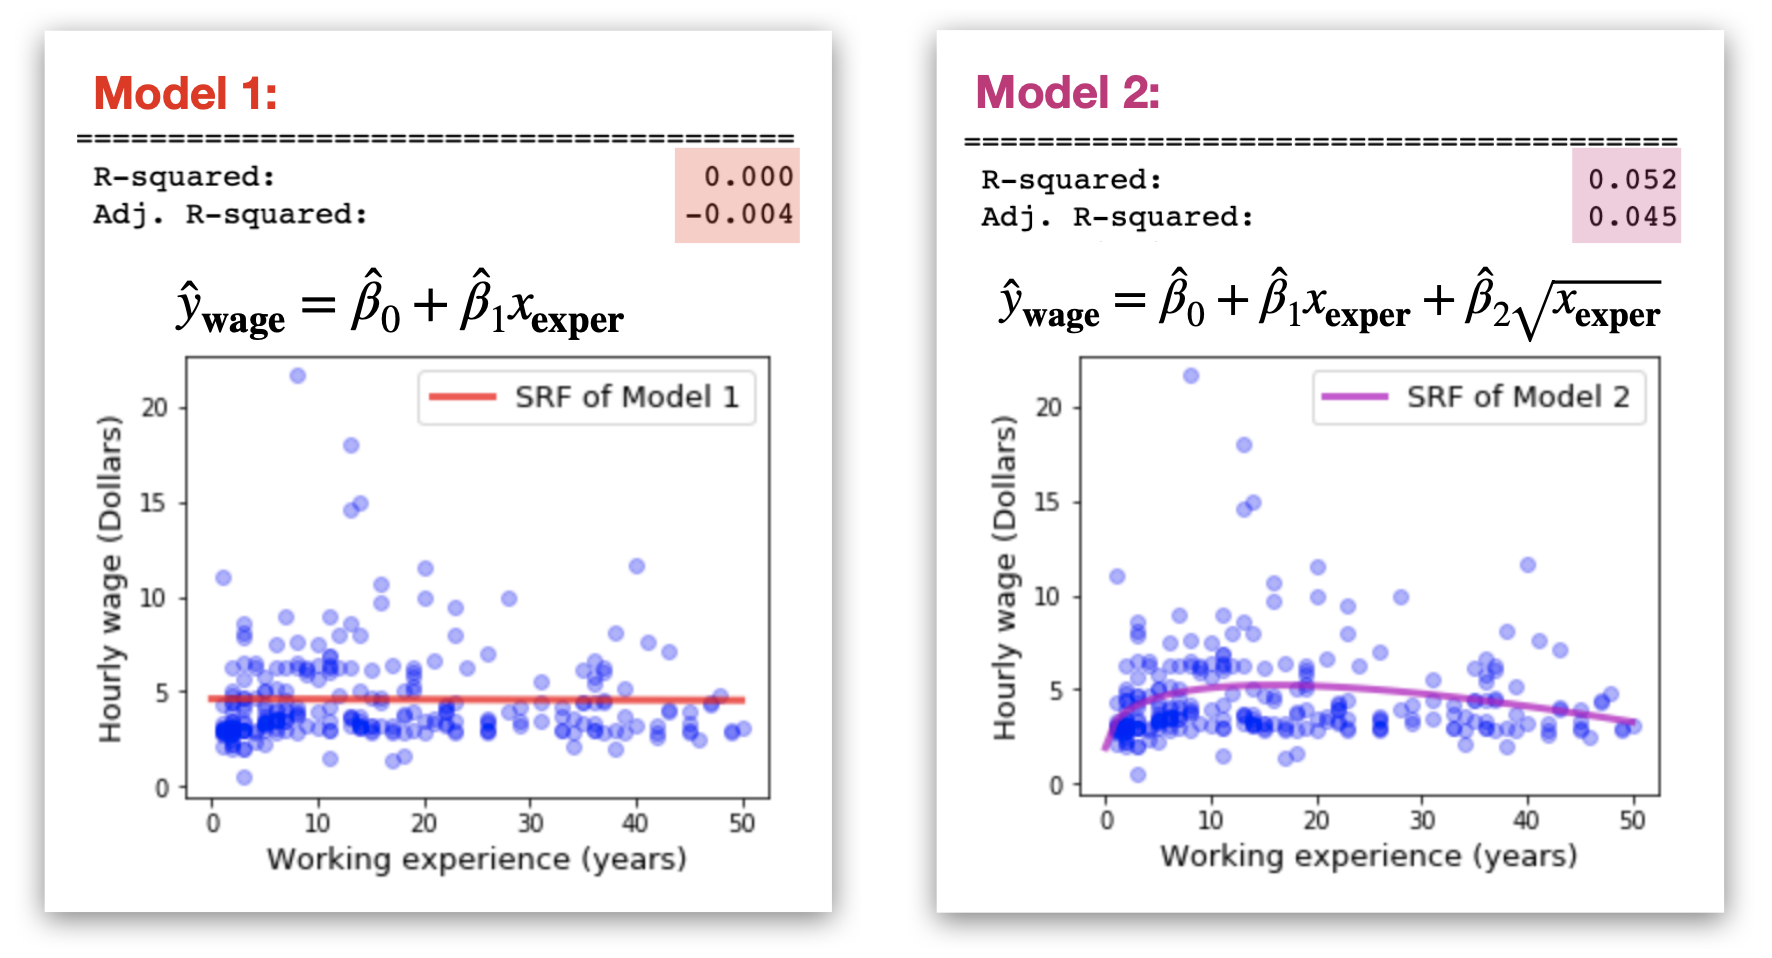

From the comparison between **Model 1** and **Model 2**, we have the following observations:
1. **Model 2** has improved $R^2$ and adjusted $R^2$ values, so it is a better fit of the sample data.
2. The SRF curves (please plot it by yourself) of both models also show that **Model 2** better capture the trend of the hourly wages.
3. It has been shown that the linear term in **Model 1** is ineffective in capturing the nonlinear trend. For **Model 2**, $P$-values associated with slope parameters are all below $\alpha=0.05$, suggesting that these parameters are unlikely to be zeros and there are some nonlinear relation between these variables. 
4. Please note that in this example, the ceteris paribus analysis is no longer valid because we can not hold the other term $\sqrt{x_{\text{exper}}}$ fixed while change the value of $x_{\text{exper}}$. As a result, we need to consider $\hat{\beta}_1x_{\text{exper}} + \hat{\beta}_2\sqrt{x_{\text{exper}}}$ as a whole when interpreting the effect of $x_{\text{exper}}$ on the dependent variable $y_{\text{wage}}$.

In fact, the (adjusted) $R^2$ value can be further improved if we take logarithm of the dependent variable $y_{\text{wage}}$. Let us call the new model **Model 3** and the formula is
$$
\textbf{Model 3: } \log\left( y_{\text{wage}}\right)= \beta_0 + \beta_1 x_{\text{exper}} + u,
$$
and please implement it by yourself.

In [27]:
model3 = smf.ols('np.log(wage) ~ exper+np.sqrt(exper)', data=wage_female)
result3 = model3.fit()
print(result3.summary())

                            OLS Regression Results                            
Dep. Variable:           np.log(wage)   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     8.463
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           0.000278
Time:                        11:44:51   Log-Likelihood:                -144.31
No. Observations:                 252   AIC:                             294.6
Df Residuals:                     249   BIC:                             305.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.8830      0.134      6.

Please note that although nonlinear transformation could improve the performance of regression models, it also increases the complexity of models, so they are no longer that straightforward to interpret. As a result, you need to be cautious when using nonlinear transformation in explanatory modeling. 

## Categorical variables and dummies<a id="section8"></a>

In previous lectures, we have been dealing with numerical (or quantitative) independent variables. In this section, we will focus on modeling categorical (or qualitative) variables and their interpretations in regression models.

The following dataset 'condo.csv' is used as an example for explaining categorical variables. 

In [28]:
condo = pd.read_csv('condo.csv')
condo.head()

,name,price,unit_price,district_code,segment,type,area,level,remaining_years,date
0,SEASCAPE,4388000,2028,4,CCR,Resale,2164,06 to 10,87.0,Nov-19
1,COMMONWEALTH TOWERS,1300000,1887,3,RCR,Resale,689,16 to 20,93.0,Nov-19
2,THE TRILINQ,1755000,1304,5,OCR,Resale,1346,06 to 10,92.0,Nov-19
3,THE CREST,2085000,2201,3,RCR,Resale,947,01 to 05,92.0,Nov-19
4,THE ANCHORAGE,1848888,1468,3,RCR,Resale,1259,01 to 05,999.0,Nov-19


These categorical variables are:
- <code>district_code</code>: The district code indicating these condos' locations. Details can be found [here](https://www.mingproperty.sg/singapore-district-code/) 
- <code>segment</code>: The region segments of condos. There are three categories: core central region (CCR), outside central region (OCR), and the rest of central region (RCR).
- <code>type</code>: Type transactions: resale or new sale.
- <code>level</code>: Condo levels. This column can be converted to numeric values if necessary. 

Please note that whether a variable is categorical may depend on specific applications. For example, the column <code>date</code> is usually considered as time stamps, but in some rare cases it could also be recognized as categorical data. Another special case is the column <code>district_code</code> Although all values of this column are numerical, this variable is categorical as all numbers are used to indicate different categories. 

### Dummies for two categories <a id="subsection8.1"></a>
In regression models, the categorical information is captured by a **binary variable** or a **dummy variable**. Take the categorical variable <code>type</code> for example, the two categories are differentiated by a dummy variable $d_{\text{resale}}$, where $d_{\text{resale}}=1$ if <code>type='Resale'</code> and $d_{\text{resale}}=0$ if <code>type='New Sale'</code>. The zero-one values of the dummy variable is then used in the regression model to address categorical variables. 

<div class="alert alert-block alert-success">
<b>Example 4:</b> Given the dataset 'condo.csv' and consider all condos that:
    <li> in district 5, </li>
    <li> has an area smaller than 1500 square feet, </li>
    <li> has a tenure of no more than 99 years remaining. </li>
    Run a regression model with the total price $y_{\text{price}}$ being the dependent variable and the categorical variable $x_{\text{type}}$ being the independent variable. 
</div>

A zero-one dummy variable $d_{\text{resale}}$ is used in the regression model to indicate the type of the condo. The formula for the regression model is thus given as
$$
y_{\text{price}} = \beta_0 + \beta_1 d_{\text{resale}} + u
$$
where the dummy variable $d_{\text{resale}}=1$ if it is a resale condo, and $d_{\text{resale}}=0$ if it is a new sale condo. Such a model can be implemented by the code below.

In [29]:
condo_subset = condo.loc[(condo['district_code']==5) & 
                         (condo['area']<1500) & 
                         (condo['remaining_years']<100)]

In [30]:
model = smf.ols('price ~ type', condo_subset)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     24.39
Date:                Sun, 17 Oct 2021   Prob (F-statistic):           8.82e-07
Time:                        11:46:50   Log-Likelihood:                -19629.
No. Observations:                1402   AIC:                         3.926e+04
Df Residuals:                    1400   BIC:                         3.927e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.067e+06   9793.835    108.

It can be seen that the formula of the model is specified by the string <code>price ~ type</code>, where <code>price</code> and <code>type</code> are the column labels of the dependent and independent variables, respectively. As the users of the <code>statsmodels</code> package, we do not have to manually create the dummy variable $d_{\text{resale}}$ by mapping the categories to the zero-one values. The package automatically creates the dummy variable $d_{\text{resale}}$ and the estimated slope parameter ($\hat{\beta}_1$) of the dummy variable  is given by the row <code>type[T.Resale]</code>. The notation <code>[T.Resale]</code> means that the dummy variable is one if the categorical variable has the value <code>'Resale'</code>. 

Because the dummy variable $d_{\text{resale}}$ takes zero or one, the fitted model can be written as follows under different categories:
\begin{align}
\text{Resale condos where }d_{\text{resale}}=1: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1d_{\text{resale}} = \hat{\beta}_0 + \hat{\beta}_1 \\
\text{New sale condos where }d_{\text{resale}}=0: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1 d_{\text{resale}}= \hat{\beta}_0.
\end{align}

It can be seen that $\hat{\beta}_0$ is the fitted value of prices for new sale condos, and $\hat{\beta}_1$ is the amount of price change of resale condos compared with new condos. In this example, we have $\hat{\beta}_1=$7.965e+04, implying that the resale condos are roughly 80 thousand Dollars more expensive compared with new sale condos. As we mentioned in previous lectures, the counterintuitive result is due to confounding factors, which we will address by next using multiple regression analysis. 

Let us include <code>area</code> as another independent variable of the regression model, so the formula of the model is
$$
y_{\text{price}} = \beta_0 + \beta_1 d_{\text{resale}} + \beta_2 x_{\text{area}} + u
$$
and results are presented below.

In [31]:
model = smf.ols('price ~ type + area', condo_subset)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     3271.
Date:                Sun, 17 Oct 2021   Prob (F-statistic):               0.00
Time:                        11:47:11   Log-Likelihood:                -18424.
No. Observations:                1402   AIC:                         3.685e+04
Df Residuals:                    1399   BIC:                         3.687e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.887e+05   1.17e+04     16.

The fitted model would take different equations under the resale/new sale categories:
\begin{align}
\text{Resale condos where }d_{\text{resale}}=1: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1d_{\text{resale}} + \hat{\beta}_2x_{\text{area}} = (\hat{\beta}_0 + \hat{\beta}_1) + \hat{\beta}_2x_{\text{area}} \\
\text{New sale condos where }d_{\text{resale}}=0: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1 d_{\text{resale}} + \hat{\beta}_2x_{\text{area}}= \hat{\beta}_0 + \hat{\beta}_2x_{\text{area}}.
\end{align}
so the interpretations of $\hat{\beta}_1$ are 1) the price difference between resale and new sale condos, holding the condo size fixed; and 2) the difference in the intercepts of the SRF curves for both categories.

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/condo_price_areas_type.png?raw=true">

Based on the equations and graph above, we may also derive the interpretations of other model parameters as below:
- $\hat{\beta}_0$: the intercept of the SRF for new sale condos.
- $\hat{\beta}_2$: the slope parameter of $x_{\text{area}}$ for both resale and new sale condos.

### Dummies for multiple categories<a id="subsection8.2"></a>
In the condo price dataset, we have some categorical variables that have more than two categories, such as the variable <code>segment</code>. Generally speaking, a categorical variable with $m$ categories is expressed by $m-1$ dummy variables. The variable <code>segment</code> that has three categories (CCR, OCR, and RCR) therefore can be expressed by two dummy variables $d_{\text{CCR}}$ and $d_{\text{RCR}}$. The values of the dummy variables are determined as the following table. 

<b> </b> | $d_{\text{OCR}}$ | $d_{\text{RCR}}$
:------|:------------|:-----------------
**CCR** | 0 | 0 
**OCR** | 1 | 0
**RCR** | 0 | 1 

The case of "CCR" is recognized as the **baseline**, or sometimes called the **reference** or **benchmark** case, where all dummy variables take the zero values. For the category "OCR" ("RCR"), the corresponding dummy variable $d_{\text{OCR}}$ ($d_{\text{RCR}}$) is one, while the other dummy variable $d_{\text{RCR}}$ ($d_{\text{OCR}}$) is zero. These dummy variables are used in regression models to capture categorical data information, as illustrated by the next Example.

<div class="alert alert-block alert-success">
    <b>Example 5:</b> Given the dataset 'condo.csv' and consider all <b>freehold</b> condos <b>smaller than 1500 square feet</b>, run a regression model with the total price $y_{\text{price}}$ being the dependent variable and the categorical variable $x_{\text{segment}}$ and the numerical variable $x_{\text{area}}$ being the independent variables. 
</div>
The model formula with dummy variables are given below:
$$
y_{\text{price}} = \beta_0 +\beta_1 d_{\text{OCR}} + \beta_2 d_{\text{RCR}} + \beta_3 x_{\text{area}} + u.
$$

Similar to the previous examples, we just need to use column labels to specify the model formula.

In [20]:
 condo_subset = condo.loc[(condo['area']<1500) & (condo['remaining_years'] > 99)]

model = smf.ols('price ~ segment + area', condo_subset)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.575
Method:                 Least Squares   F-statistic:                     2602.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:50:39   Log-Likelihood:                -82693.
No. Observations:                5767   AIC:                         1.654e+05
Df Residuals:                    5763   BIC:                         1.654e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       9.327e+05   2.28e+04     40.

The fitted model for each category is given as follows
\begin{align}
\text{CCR condos where }d_{\text{OCR}}=0\text{ and }d_{\text{RCR}}=0: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1d_{\text{OCR}} + \hat{\beta}_2d_{\text{RCR}} + \hat{\beta}_3 x_{\text{area}} = \hat{\beta}_0 + \hat{\beta}_3x_{\text{area}} \\
\text{OCR condos where }d_{\text{OCR}}=1\text{ and }d_{\text{RCR}}=0: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1d_{\text{OCR}} + \hat{\beta}_2d_{\text{RCR}} + \hat{\beta}_3 x_{\text{area}} = (\hat{\beta}_0 + \hat{\beta}_1) + \hat{\beta}_3x_{\text{area}} \\
\text{RCR condos where }d_{\text{OCR}}=0\text{ and }d_{\text{RCR}}=1: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1d_{\text{OCR}} + \hat{\beta}_2d_{\text{RCR}} + \hat{\beta}_3 x_{\text{area}} = (\hat{\beta}_0 + \hat{\beta}_2) + \hat{\beta}_3x_{\text{area}} \\
\end{align}
so clearly the interpretations of model parameters are:
- $\hat{\beta}_0$: the intercept of condos located in the CCR segment.
- $\hat{\beta}_1$: the difference in intercepts of OCR condos compared with CCR condos.
- $\hat{\beta}_2$: the difference in intercepts of RCR condos compared with CCR condos.
- $\hat{\beta}_3$: the slope parameter of $x_{\text{area}}$ for condos in all segments.

We thus conclude that the intercept $\hat{\beta}_0$ is the intercept of the **baseline** category, and slope parameters $\hat{\beta}_1$ and $\hat{\beta}_2$ of dummy variables indicate the difference between the corresponding category compared with the baseline case. That is why the baseline case is also called **benchmark** or **reference** case. For the other independent variable $x_{\text{area}}$, all categories share the same slope parameter $\hat{\beta}_3$. The SRF curves are illustrated by the following graph.

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/condo_price_areas_seg.png?raw=true">

<div class="alert alert-block alert-success">
<b>Example 6:</b> Given the dataset 'condo.csv' and consider all <b>freehold</b> condos <b>smaller than 1500 square feet</b>, run a regression model with the total price $y_{\text{price}}$ being the dependent variable and the categorical variable $x_{\text{district_code}}$ and the numerical variable $x_{\text{area}}$ being the independent variables. 
</div>

In this example, we consider the column <code>district_code</code> in our regression model. This is a slightly different case because all values of the column are integers, so it will be recognized by Python as a numerical variable by default. This column <code>district_code</code> can be converted to a categorical variable by using the function <code>C()</code> in the string type formula, as the following code cell.

In [17]:
condo_subset = condo.loc[(condo['area']<1500) & (condo['remaining_years'] > 99)]

model = smf.ols('price ~ C(district_code) + area', condo_subset)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.661
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     487.6
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:50:31   Log-Likelihood:                -82040.
No. Observations:                5767   AIC:                         1.641e+05
Df Residuals:                    5743   BIC:                         1.643e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               5.01

### Interaction terms <a id="subsection8.3"></a>
In previous examples, dummy variables were used so the SRF curves took different intercepts for different categories. The slope parameter of the numerical variable $x_{\text{area}}$, however, remained the same value for all categories. It implied that condos in different categories (types, segments, or districts) have the same per square feet price, which is not exactly true in the property market. For example, we expect to see the per square feet price for the new sale condos higher than the resale condos. In other words, the slope parameter of $x_{\text{area}}$ for the "new sale" category should be larger than that of the "resale" category. 

In regression models, we could devise different slope parameters for various categories by introducing **interaction terms** to the formula, as demonstrated by the next example.

<div class="alert alert-block alert-success">
<b>Example 7:</b> Given the dataset 'condo.csv' and consider all condos that:
    <li> in district 5, </li>
    <li> has an area smaller than 1500 square feet, </li>
    <li> has a tenure of no more than 99 years remaining. </li>
    Run a regression model with the total price $y_{\text{price}}$ being the dependent variable, $x_{\text{type}}$ and $x_{\text{area}}$ being the independent variables. The slope parameter of $x_{\text{area}}$ takes different values for categories "resale" and "new sale". 
</div>

Let $d_{\text{resale}}$ be the dummy variable that equals to one if a condo is resale and zero otherwise, then the model formula can be written as
$$
y_{\text{price}} = \beta_0 + \beta_1 d_{\text{resale}} + \beta_2 x_{\text{area}} + \beta_3 d_{\text{resale}}\cdot x_{\text{area}} + u.
$$
The fourth term of the equation is an interaction term that considers the product of the dummy variable $d_{\text{resale}}$ and the numerical variable $x_{\text{area}}$. Apparently, the fitted models for these two categories can be written as
\begin{align}
\text{Resale condos where }d_{\text{resale}}=1: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1d_{\text{resale}} + \hat{\beta}_2x_{\text{area}} + \hat{\beta}_3 d_{\text{resale}}\cdot x_{\text{area}} = (\hat{\beta}_0 + \hat{\beta}_1) + (\hat{\beta}_2 + \hat{\beta}_3)x_{\text{area}} \\
\text{New sale condos where }d_{\text{resale}}=0: ~&\hat{y}_{\text{price}} = \hat{\beta}_0 + \hat{\beta}_1 d_{\text{resale}} + \hat{\beta}_2x_{\text{area}} + \hat{\beta}_3 d_{\text{resale}}\cdot x_{\text{area}} = \hat{\beta}_0 + \hat{\beta}_2x_{\text{area}},
\end{align}
where the slope parameter of $x_{\text{area}}$ is $\hat{\beta}_2+\hat{\beta}_3$ for "resale" condos and $\hat{\beta}_2$ for "new sale" condos.

For the <code>statsmodels</code> package, there are two ways of implementing the interaction terms, as following two code cells. 

In [18]:
condo_subset = condo.loc[(condo['district_code']==5) & 
                         (condo['area']<1500) & 
                         (condo['remaining_years']<100)]

model = smf.ols('price ~ type*area', condo_subset)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2317.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:50:31   Log-Likelihood:                -18388.
No. Observations:                1402   AIC:                         3.678e+04
Df Residuals:                    1398   BIC:                         3.681e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.408e+05   1

In [19]:
condo_subset = condo.loc[(condo['district_code']==5) & 
                         (condo['area']<1500) & 
                         (condo['remaining_years']<100)]

model = smf.ols('price ~ type + area + type:area', condo_subset)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     2317.
Date:                Sun, 19 Sep 2021   Prob (F-statistic):               0.00
Time:                        14:50:31   Log-Likelihood:                -18388.
No. Observations:                1402   AIC:                         3.678e+04
Df Residuals:                    1398   BIC:                         3.681e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.408e+05   1

It can be seen that the results are exactly the same, and the SRF curves for both categories are displayed by the following graph.

<img src="https://github.com/XiongPengNUS/dao_resources/blob/main/condo_price_areas_type_int.png?raw=true">

According to the higher adjusted $R^2$ value, this model provides a better fit compared with the model without an interaction term.

## Case studies <a id="section9"></a>

### Case study 1: Singapore condo prices <a id="subsection9.1"></a>
Please design a explanatory model for the Singapore condo price data. The dependent variable should be the total price, or the unit price, and you may use any nonlinear or interaction terms to improve the adjusted $R^2$ value. In order to make it simpler, let us only focus on **district 5**. 